In [122]:
import PIL
from PIL import Image, ImageOps, ImageFilter
import pytesseract
import re
import os
import matplotlib.pyplot as plt
import numpy as np

PIL.Image.MAX_IMAGE_PIXELS = None #Increase image size limit

In [86]:
img = Image.open("/Users/titouanlegourrierec/Desktop/49.jpg")
width, height = img.size #image dimensions

In [87]:
def resizing(img, direction):
    """

    """
    width, height = img.size

    line_step = 20
    pixel_step = 20

    if direction == "height":
        top = None
        bottom = None

        for y in range(0, height, line_step):
            sum = 0
            for x in range(0, width, pixel_step):
                pixel = img.getpixel((x, y))
                sum += (pixel[0]+pixel[1]+pixel[2]) / 3
            
            avg_y = sum / (width/pixel_step) #average black and white component on a line.

            if avg_y < 170 and top is None: #detects the upper limit of the leaf
                top = y
            
            if avg_y > 220 and top is not None and bottom is None: #detects the lower limit of the leaf
                bottom = y
                break
        
        return top, bottom
    
    """
    if direction == "width":
        left = None
        right = None

        for x in range(0, width, line_step):
            sum = 0
            for y in range(0, height, pixel_step):
                pixel = img.getpixel((x, y))
                sum += (pixel[0]+pixel[1]+pixel[2]) / 3
            
            avg_x = sum / (width/pixel_step) #average black and white component on a line.

            if avg_x < 150 and left is None: #detects the upper limit of the leaf
                left = x
            
            if avg_x > 220 and left is not None and right is None: #detects the lower limit of the leaf
                right = x
                break
        
        return left, right
    """

In [129]:
def image_parts(img):
    """
    Divides an image into 5 equal-width parts.

    Parameters:
    - img: PIL.Image.Image
        The input image.

    Returns:
    - list of PIL.Image.Image
        A list containing 5 sub-images, each representing one part of the original image.
    """

    width, height = img.size #image dimensions
    part_width = width//5 #width of each part

    parts =[]

    for i in range(5):
        left = i * part_width
        right = (i + 1) * part_width

        part = img.crop((left, 0, right, height))

        #top, bottom = resizing(part, "height")
        #part_resize = part.crop((0, top, part_width, bottom))

        parts.append(part)

    return parts

In [130]:
def Unusable_File(img):
    width, height = img.size
    if height < 14000 or height > 22000:
        return True

In [181]:
def is_leaf(img):
    width, height = img.size
    
    line_step = 20
    pixel_step = 20

    avg = []

    for y in range(0, height, line_step):
        sum = 0
        for x in range(0, width, pixel_step):
            pixel = img.getpixel((x, y))
            sum += (pixel[0]+pixel[1]+pixel[2]) / 3
            
            avg_y = sum / (width/pixel_step)
            
            avg.append(avg_y)
    
    avg = np.array(avg)
    if avg.mean() > 115: #112 good
        return False
    
    return True

In [187]:
def Image_Processing(entry_path, exit_path):
    Nb_File = 0
    Count_File = 0
    Count_Unusable_File = 0
    Not_A_Leaf = 0
    
    for filename in os.listdir(entry_path):
        if filename.lower().endswith('.jpg'):
            Nb_File += 1

    for i in range(Nb_File):
        full_path = os.path.join(entry_path, str(i+1) + ".jpg")
            
        img = Image.open(full_path)
        Count_File += 1

        if Unusable_File(img):
            Count_Unusable_File += 1
            img.save(f"{exit_path}/Unusable_File/Unusable_File_{Count_File}.jpg")
            continue
        else:
            parts = image_parts(img)
            
            for i, part in enumerate(parts):
                if not is_leaf(part):
                    Not_A_Leaf += 1
                    part.save(f"{exit_path}/Not_A_Leaf/Sheet{Count_File}_leaf{i + 1}.jpg")
                else:
                    part.save(f"{exit_path}/File/Sheet{Count_File}_leaf{i + 1}.jpg")
            
        print(f"Usable File : {Count_File-Count_Unusable_File},     Unusable File : {Count_Unusable_File},      Not a Leaf : {Not_A_Leaf}")

In [188]:
Image_Processing("/Users/titouanlegourrierec/Desktop/all_scan_data/all_090523", "/Users/titouanlegourrierec/Desktop/results")

Usable File : 1,     Unusable File : 0,      Not a Leaf : 0
Usable File : 2,     Unusable File : 0,      Not a Leaf : 0
Usable File : 3,     Unusable File : 0,      Not a Leaf : 0
Usable File : 4,     Unusable File : 0,      Not a Leaf : 0
Usable File : 5,     Unusable File : 0,      Not a Leaf : 0
Usable File : 6,     Unusable File : 0,      Not a Leaf : 0
Usable File : 7,     Unusable File : 0,      Not a Leaf : 0
Usable File : 8,     Unusable File : 0,      Not a Leaf : 0
Usable File : 9,     Unusable File : 0,      Not a Leaf : 0
Usable File : 10,     Unusable File : 0,      Not a Leaf : 0
Usable File : 11,     Unusable File : 0,      Not a Leaf : 0
Usable File : 12,     Unusable File : 0,      Not a Leaf : 0
Usable File : 13,     Unusable File : 0,      Not a Leaf : 0
Usable File : 14,     Unusable File : 0,      Not a Leaf : 0
Usable File : 15,     Unusable File : 0,      Not a Leaf : 0
Usable File : 16,     Unusable File : 0,      Not a Leaf : 0
Usable File : 17,     Unusable Fi

KeyboardInterrupt: 

# test

2067 16464


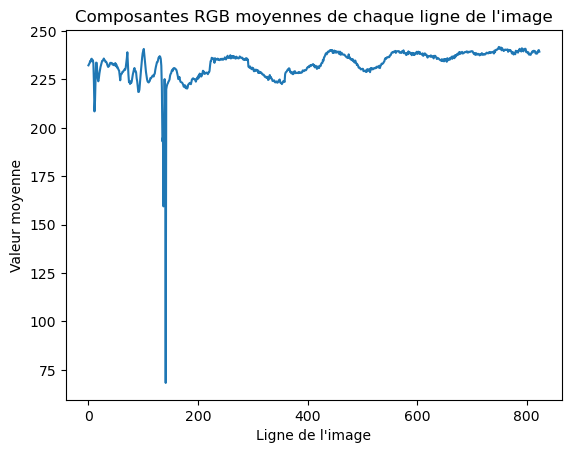

232.88249781197226


In [135]:
# Ouvrir l'image
img = Image.open("/Users/titouanlegourrierec/Desktop/results/File/Sheet23_leaf3.jpg")

# Obtenir les dimensions de l'image
width, height = img.size
print(width,height)

pas_ligne = 20
pas_pixel = 20

avg =[]
# Listes pour stocker les valeurs moyennes de chaque composante RGB

# Parcourir chaque ligne de l'image
for y in range(0, height, pas_ligne):
    # Initialiser les valeurs moyennes des composantes RGB pour cette ligne
    sum = 0
    
    # Parcourir chaque pixel de cette ligne et ajouter ses composantes RGB à la somme
    for x in range(0, width, pas_pixel):
        pixel = img.getpixel((x, y))
        sum += (pixel[0]+pixel[1]+pixel[2])/3
    
    # Calculer la moyenne des composantes RGB pour cette ligne
    avg.append(sum / (width/pas_pixel))

# Tracer les valeurs moyennes obtenues pour chaque composante RGB
plt.plot(avg)
plt.xlabel('Ligne de l\'image')
plt.ylabel('Valeur moyenne')
plt.title('Composantes RGB moyennes de chaque ligne de l\'image')
plt.show()

avg = np.array(avg)
print(avg.mean())

In [180]:
is_leaf(Image.open("/Users/titouanlegourrierec/Desktop/results/Not_A_Leaf/Sheet42_leaf5.jpg"))

112.29601136538189